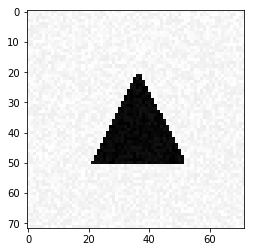

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



In [120]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


# SGD OPTIMIZER

In [121]:
#transform lables to categorical
from keras.utils import to_categorical
Y_train=to_categorical(Y_train)

In [123]:
#loading modules and fitting the SGD optimizer
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

n_col=X_train.shape[1]

model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_shape=(n_col,)))
model1.add(Dense(units=3, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 3.1274 - acc: 0.2867
Epoch 2/10
300/300 [==============================] - 0s 267us/step - loss: 1.0704 - acc: 0.4733
Epoch 3/10
300/300 [==============================] - 0s 280us/step - loss: 1.0276 - acc: 0.5333
Epoch 4/10
300/300 [==============================] - 0s 260us/step - loss: 0.9853 - acc: 0.5933
Epoch 5/10
300/300 [==============================] - 0s 256us/step - loss: 0.9219 - acc: 0.6133
Epoch 6/10
300/300 [==============================] - 0s 301us/step - loss: 0.8560 - acc: 0.6200
Epoch 7/10
300/300 [==============================] - 0s 271us/step - loss: 0.8133 - acc: 0.6167
Epoch 8/10
300/300 [==============================] - 0s 299us/step - loss: 0.7564 - acc: 0.6700
Epoch 9/10
300/300 [==============================] - 0s 267us/step - loss: 0.6985 - acc: 0.6967
Epoch 10/10
300/300 [==============================] - 0s 280us/step - loss: 0.6213 - acc: 0.7133


In [130]:
#Running predictions 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
predictions1 = model1.predict([X_test])
print(predictions1)


[[1.0000000e+00 2.6959965e-30 0.0000000e+00]]


In [ ]:
#predictions correspond to probablity values of [1,0,0]

# Adam Classifier

In [127]:
#Build the classifier
model2 = Sequential()
model2.add(Dense(units=64, activation='relu', input_shape=(n_col,)))
model2.add(Dense(units=3, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 3.1053 - acc: 0.3267
Epoch 2/10
300/300 [==============================] - 0s 347us/step - loss: 1.1001 - acc: 0.4967
Epoch 3/10
300/300 [==============================] - 0s 431us/step - loss: 0.8256 - acc: 0.6800
Epoch 4/10
300/300 [==============================] - 0s 409us/step - loss: 0.5621 - acc: 0.7500
Epoch 5/10
300/300 [==============================] - 0s 430us/step - loss: 0.4801 - acc: 0.7767
Epoch 6/10
300/300 [==============================] - 0s 390us/step - loss: 0.4298 - acc: 0.8100
Epoch 7/10
300/300 [==============================] - 0s 392us/step - loss: 0.3726 - acc: 0.8833
Epoch 8/10
300/300 [==============================] - 0s 391us/step - loss: 0.3520 - acc: 0.9067
Epoch 9/10
300/300 [==============================] - 0s 395us/step - loss: 0.3376 - acc: 0.9200
Epoch 10/10
300/300 [==============================] - 0s 400us/step - loss: 0.3112 - acc: 0.9067


In [194]:
#Run predictions 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
predictions2 = model2.predict([X_test])
print(predictions2)


[[0. 1. 0.]]


# Visualization of the Solution

In [133]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.callbacks import EarlyStopping

#Get the weights of first part which corresponds to the matrix of the classifier
weights= model2.get_weights()[0]
print(weights)

[[-0.0249532   0.01840563 -0.00252261 ...  0.00787999  0.00099903
  -0.0203348 ]
 [ 0.01573728 -0.01202887 -0.0265994  ... -0.00863143 -0.01719317
  -0.02567134]
 [ 0.01425961  0.0231226  -0.00974581 ... -0.02375943 -0.01289161
   0.02222058]
 ...
 [-0.02851922 -0.01436382  0.02635255 ...  0.0084053  -0.03202884
   0.003859  ]
 [-0.02984266  0.01529815 -0.01911621 ... -0.00547756 -0.02472496
  -0.01785387]
 [-0.02874304  0.01875543 -0.0156634  ...  0.00804136 -0.02950636
  -0.02995172]]


In [195]:
#put columns 1, 2 and 3 into arrays 
array1 = weights[:,0]
array2 = weights[:,1]
array3 = weights[:,3]

Plotting the weights for columns 1,2 and 3

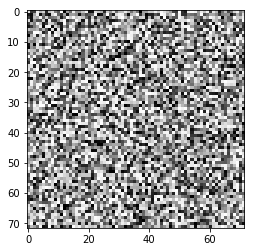

In [288]:
#plots a rectangle
plt.imshow(array1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

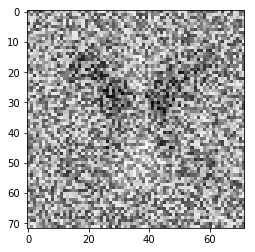

In [289]:
#plots a disk
plt.imshow(array2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

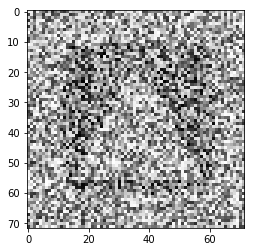

In [146]:
#plots a trianngle
plt.imshow(array3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

# A More Difficult Classification Problem

In [206]:
[X_train, Y_train] = generate_dataset_classification(750, 20, True)
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740


In [211]:
#Reshape the data into (n_images, x_shape, y_shape, n_steps)
X_train = X_train.reshape([-1,72,72,1])
print(X_train.shape)
n_col = X_train.shape[2] 
n_row = X_train.shape[1]

1
(750, 72, 72, 1)


In [167]:
Y_train = to_categorical(Y_train)
model3 = Sequential() 

#Add a convolutional layer
model3.add(Conv2D(16, kernel_size = 5, activation='relu',  input_shape = (n_col,n_row,1)))

#Add a pooling layer
model3.add(MaxPool2D(2))

#Add a convolutional layer
model3.add(Conv2D(16, kernel_size = 5, activation='relu'))

#Add a pooling layer
model3.add(MaxPool2D(2))

model3.add(Flatten()) 

model3.add(Dense(3, activation = 'softmax'))

#compile the model
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [168]:
#fit and train the model 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 2)
model3.fit(X_train, Y_train, epochs=100, batch_size = 32,validation_split = 0.3, callbacks = [early_stopping])

Train on 525 samples, validate on 225 samples
Epoch 1/100
525/525 [==============================] - 5s 9ms/step - loss: 1.0943 - acc: 0.4152 - val_loss: 1.0570 - val_acc: 0.4400
Epoch 2/100
525/525 [==============================] - 3s 6ms/step - loss: 0.9891 - acc: 0.4971 - val_loss: 0.9487 - val_acc: 0.5022
Epoch 3/100
525/525 [==============================] - 3s 6ms/step - loss: 0.8655 - acc: 0.6095 - val_loss: 0.8142 - val_acc: 0.6267
Epoch 4/100
525/525 [==============================] - 3s 6ms/step - loss: 0.7617 - acc: 0.6610 - val_loss: 0.7683 - val_acc: 0.6356
Epoch 5/100
525/525 [==============================] - 3s 6ms/step - loss: 0.7058 - acc: 0.7181 - val_loss: 0.7024 - val_acc: 0.6756
Epoch 6/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6659 - acc: 0.7314 - val_loss: 0.6483 - val_acc: 0.7467
Epoch 7/100
525/525 [==============================] - 3s 6ms/step - loss: 0.5843 - acc: 0.7924 - val_loss: 0.6095 - val_acc: 0.7289
Epoch 8/100
525/525 [==

In [172]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 16)        6416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 10803     
Total params: 17,635
Trainable params: 17,635
Non-trainable params: 0
_________________________________________________________________


In [175]:
#Evaluate test set
[X_test, Y_test] = generate_test_set_classification()
#Reshape the data
X_test = X_test.reshape([-1,72,72,1])

model3.evaluate(X_test, Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 1s 3ms/step


[0.22465118686358135, 0.9233333333333333]

The accuracy and the loss of the model are 0.9233333333333333 and 0.22465118686358135 respectively

# 6. A Regression Problem 

In [296]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


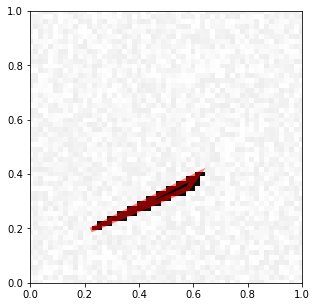

In [298]:
#visualize predictions 
visualize_prediction(X_train[0], Y_train[0])

In [299]:
X_train.shape

(300, 5184)

In [300]:
Y_train.shape

(300, 6)

In [301]:
Y_train[0]

array([0.61651065, 0.39829636, 0.22300274, 0.19409006, 0.57936031,
       0.34615314])

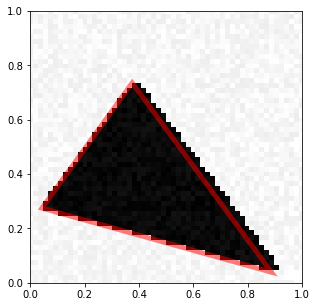

In [304]:
visualize_prediction(X_train[1], Y_train[1])

In [306]:
X_Train = X_train.reshape([-1, 72,72,1])

In [308]:
# Creating model with one convolution layer one maxpool one flatten layer and fitting the data
model4 = Sequential()
model4.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model4.add(Flatten())
model4.add(Dense(6, ))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model4.fit(X_Train,Y_train, batch_size=32,epochs=10)

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1490 - acc: 0.1500
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0875 - acc: 0.2067
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0672 - acc: 0.3267
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0543 - acc: 0.3933
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0474 - acc: 0.4133
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0385 - acc: 0.4800
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0329 - acc: 0.5133
Epoch 8/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0258 - acc: 0.5567
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0199 - acc: 0.6300
Epoch 10/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0163 - acc: 0.6500


In [312]:
#generate test set
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [314]:
#reshape test data
X_Test = X_test.reshape([-1, 72,72,1])
Y_pred=model4.predict(X_Test)
Y_pred=normalize(Y_pred)

In [318]:
model4.evaluate(X_Test,Y_test)

300/300 [==============================] - 1s 3ms/step


[0.07815665602684022, 0.27000000019868214]

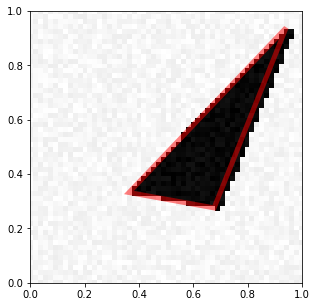

In [320]:
# visualizing the truth
visualize_prediction(X_Test[0], Y_test[0])

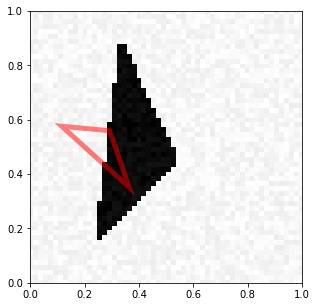

In [322]:
# Visualizing the predictions
visualize_prediction(X_Test[2], Y_pred[2])

# 7 Image Denoising

In [261]:
#generate noise randomly
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

def generate_a_rectangle_noise(free_location=False):
    noise = np.random.randint(0,100) 
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)

def generate_a_disk_noise(free_location=False):
    noise = np.random.randint(0,100)  
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)
  
def generate_a_triangle_noise(free_location=False):
    noise = np.random.randint(0,100) 
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_noise(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_noise(nb_samples, free_location=False):
    noise = np.random.randint(0,100)  
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_noise(free_location)
        else:
            [X[i], V] = generate_a_triangle_noise(free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


In [285]:
#generate training set
training_data, same = generate_dataset_noise(1000)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [286]:
#reshape training set 
X_train = training_data[:,0]
Y_train = training_data[:,1]

X_train = X_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = Y_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)

In [287]:
#build and run model
from keras.models import Input, Model
from keras.layers import UpSampling2D, Conv2D, MaxPooling2D

inp = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))


temp=Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
temp = MaxPooling2D((2, 2), padding='same')(temp)
temp = Conv2D(32, (3, 3), activation='relu', padding='same')(temp)
temp = MaxPooling2D((2, 2), padding='same')(temp)
temp = Conv2D(32, (3, 3), activation='relu', padding='same')(temp)
temp = UpSampling2D((2, 2))(temp)
temp = Conv2D(32, (3, 3), activation='relu', padding='same')(temp)
temp = UpSampling2D((2, 2))(temp)

output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(temp)
model_denoi = Model(inp, output)
model_denoi.compile(optimizer="adam", loss='binary_crossentropy')
model_denoi.fit(X_train, Y_train, epochs=10, batch_size=128,validation_split=0.2, shuffle=True, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 28s 34ms/step - loss: 0.6425 - val_loss: 0.5012
Epoch 2/10
800/800 [==============================] - 26s 32ms/step - loss: 0.4475 - val_loss: 0.4047
Epoch 3/10
800/800 [==============================] - 24s 30ms/step - loss: 0.3597 - val_loss: 0.3023
Epoch 4/10
800/800 [==============================] - 38s 47ms/step - loss: 0.2540 - val_loss: 0.2154
Epoch 5/10
800/800 [==============================] - 27s 34ms/step - loss: 0.2031 - val_loss: 0.2012
Epoch 6/10
800/800 [==============================] - 22s 28ms/step - loss: 0.1931 - val_loss: 0.1861
Epoch 7/10
800/800 [==============================] - 20s 26ms/step - loss: 0.1845 - val_loss: 0.1852
Epoch 8/10
800/800 [==============================] - 20s 24ms/step - loss: 0.1819 - val_loss: 0.1815
Epoch 9/10
800/800 [==============================] - 18s 23ms/step - loss: 0.1797 - val_loss: 0.1799
Epoch 10/10
800/800 [===============

In [290]:
#generate testing set
test_data, _ = generate_dataset_noise(10, 20)

Creating data:
0


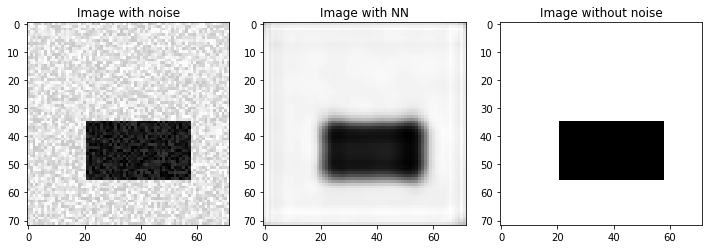

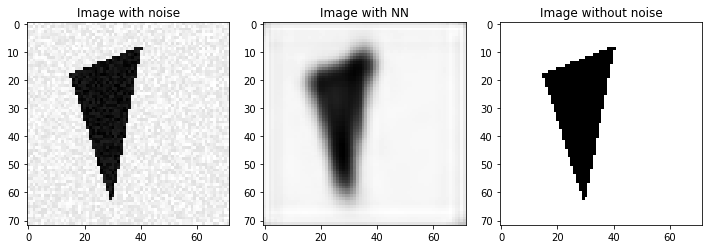

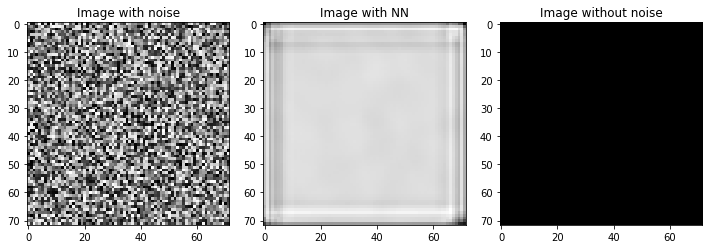

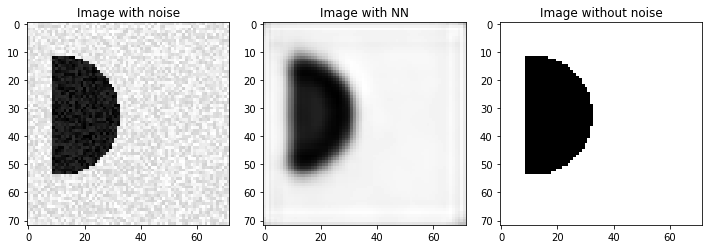

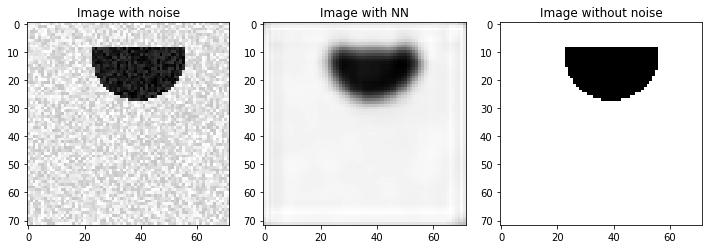

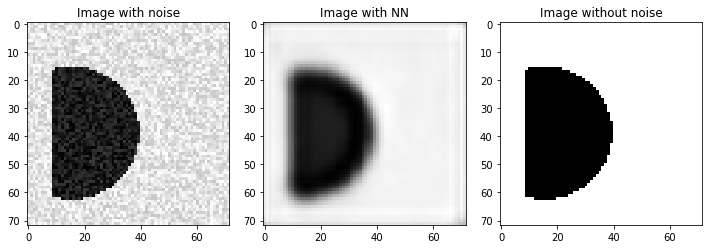

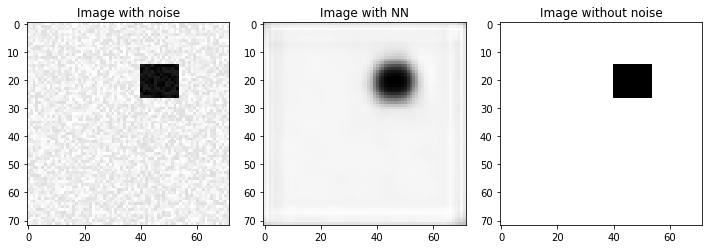

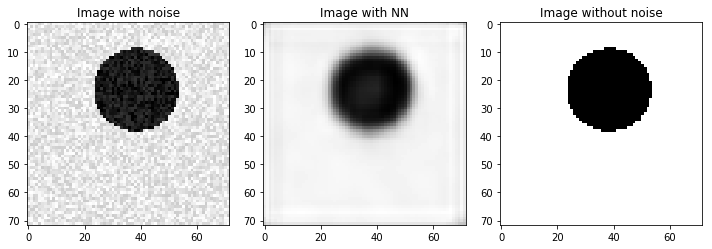

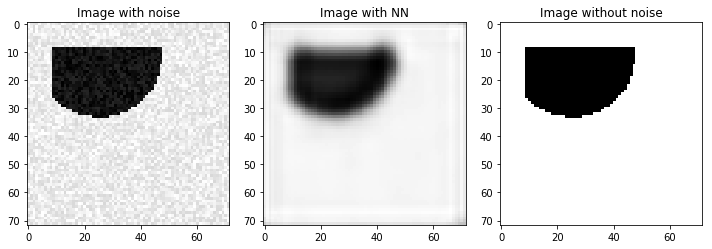

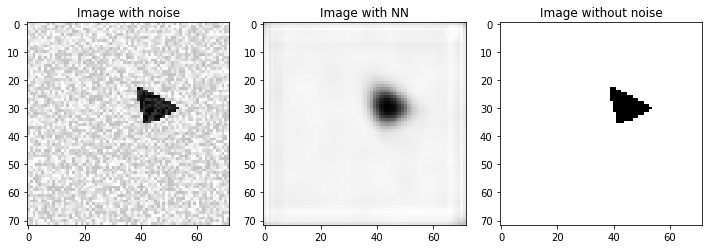

In [291]:
#reshape test data
IMAGE_SIZE = 72
X_test = test_data[:,0]
Y_test = test_data[:,1]
X_test = X_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = Y_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)
for j in range(10):
  fig = plt.figure(figsize = (10,15))
  
  ax = plt.subplot(1, 3, 1)
  plt.imshow(X_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image with noise")

  ax = plt.subplot(1, 3, 2)
  plt.imshow((model_denoiser.predict(X_test[j].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image with NN")

  ax = plt.subplot(1, 3, 3)
  plt.imshow(Y_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image without noise")

  fig.tight_layout()